In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Rule Level Data

In [2]:
rules = pd.read_csv("../output_data/seth/rule_level_data.csv")
rules.sort_values(by=["communityID", "ruleID"], inplace=True)

In [3]:
rules.head(5)

,name_change_type,description_change_type,violation_change_type,date_observed,timestamp_rule,communityID,ref,ruleID,rule_age_in_days
354500,unchanged,unchanged,never_present,2021-04-23 00:00:00,2020-01-01,007_link,https://www.reddit.com/r/007_link/,007_link_0,478
234325,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_0,112
234326,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_1,112
234327,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_2,112
234328,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_3,112


# Hypothesis Testing

## H: the older the rule, the more likely it is to be deleted

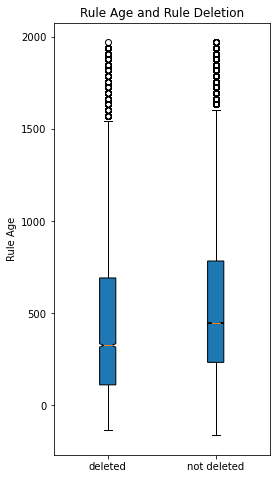

In [4]:
#    boxplot of age of rules that present at both time periods
#     boxplot of age of rules that only present at the first time period
in_both_snaps = rules[(rules.name_change_type != 'deleted') & (rules.name_change_type != 'added')]
# Creating dataset
deleted = np.array(rules[rules.name_change_type == 'deleted'].rule_age_in_days)
not_deleted = np.array(in_both_snaps.rule_age_in_days)

data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted', 'not deleted'])  # will be used to label x-ticks

plt.ylabel("Rule Age")
plt.title("Rule Age and Rule Deletion")

# show plot
plt.show()

# Sub Level Data

In [4]:
sub_metadata = pd.read_csv("../output_data/seth/sub_level_data.csv")
sub_metadata

,communityID,added,changed,deleted,unchanged,subscribers_1,subscribers_2,rules_1,rules_2,timestamp_1,timestamp_2,founding_date,age_in_months
0,007_link,0.0,0.0,0.0,1.0,7,7,1,1,1.627687e+09,1.644941e+09,1.579930e+09,14.908671
1,007nightfire,0.0,0.0,0.0,5.0,68,91,5,5,1.625925e+09,1.643361e+09,1.609863e+09,3.526107
2,00games,0.0,0.0,0.0,4.0,2,3,4,4,1.630524e+09,1.646246e+09,1.580752e+09,14.596170
3,00saesthetics,0.0,0.0,0.0,6.0,2836,2995,6,6,1.624697e+09,1.642362e+09,1.562924e+09,21.375357
4,00sbabies,0.0,0.0,0.0,6.0,300,298,6,6,1.625180e+09,1.642880e+09,1.595696e+09,8.913409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130846,zyramains,0.0,0.0,0.0,9.0,10085,11382,9,9,1.624172e+09,1.642224e+09,1.419736e+09,75.824785
130847,zyxcomments,0.0,0.0,0.0,1.0,8,8,1,1,1.627579e+09,1.644794e+09,1.562897e+09,21.385681
130848,zyzz,1.0,0.0,1.0,1.0,7245,11991,2,2,1.624310e+09,1.642229e+09,1.311994e+09,116.795459
130849,zztails,0.0,0.0,0.0,2.0,137,142,2,2,1.625469e+09,1.643165e+09,1.546838e+09,27.492575


# Hypothesis Testing-- Sub Size

## Punctuated Eq Scatterplot

In [12]:
noise = np.random.normal(0,0.25,len(sub_metadata))

In [16]:
np.random.normal(0,0.25,len(sub_metadata))

array([-0.09655081,  0.54640458,  0.377012  , ...,  0.43898779,
        0.17893409,  0.20868169])

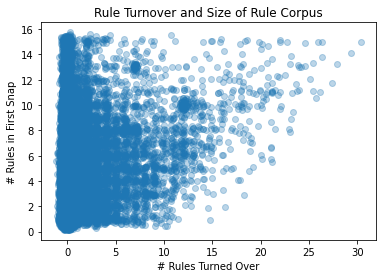

In [42]:
std = 0.25
x = np.array((sub_metadata.added + sub_metadata.deleted + sub_metadata.changed)) + np.random.normal(0, std,len(sub_metadata))
y = np.array(sub_metadata.rules_1) + np.random.normal(0,std,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.xlabel("# Rules Turned Over")
plt.ylabel("# Rules in First Snap")
plt.title("Rule Turnover and Size of Rule Corpus")

plt.show()

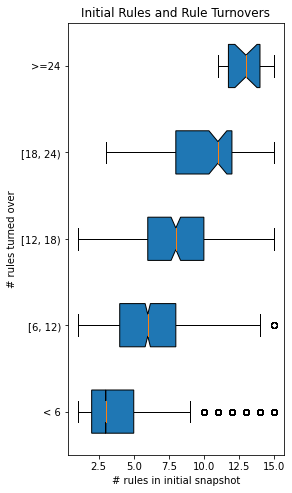

In [50]:
# Creating dataset
sub_metadata['turned_over'] = sub_metadata.added + sub_metadata.deleted + sub_metadata.changed
first_bin = np.array(sub_metadata[sub_metadata.turned_over < 6].rules_1)
second_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 6) & (sub_metadata.turned_over < 12)].rules_1)
third_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 12) & (sub_metadata.turned_over < 18)].rules_1)
fourth_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 18) & (sub_metadata.turned_over < 24)].rules_1)
fifth_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 24)].rules_1)
data = np.array([first_bin, second_bin, third_bin, fourth_bin, fifth_bin], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, notch=True, vert=False, patch_artist=True,
                 labels=['< 6', '[6, 12)', '[12, 18)', '[18, 24)', '>=24'])  # will be used to label x-ticks

plt.ylabel("# rules turned over")
plt.xlabel("# rules in initial snapshot")
plt.title("Initial Rules and Rule Turnovers")

# show plot
plt.show()

## H: The bigger the sub, the more likely that they will add >=1 rule

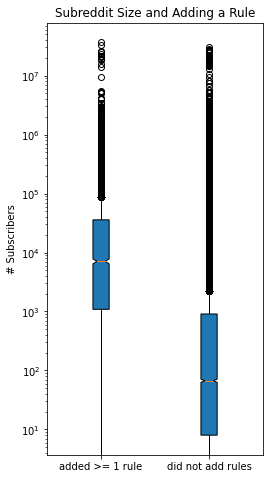

In [8]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].subscribers_1)
not_added = np.array(sub_metadata[sub_metadata.added == 0].subscribers_1)
data = np.array([added, not_added], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['added >= 1 rule', 'did not add rules'])  # will be used to label x-ticks
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.title("Subreddit Size and Adding a Rule")

# show plot
plt.show()

## H: the bigger the sub, the more rules they add

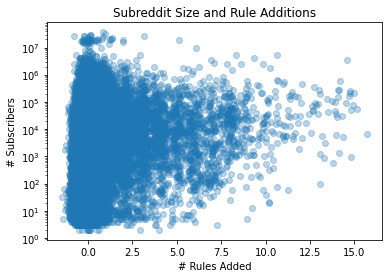

In [30]:
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.added) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.xlabel("# Rules Added")
plt.title("Subreddit Size and Rule Additions")

plt.show()

## H: the bigger the sub, the more rules they delete

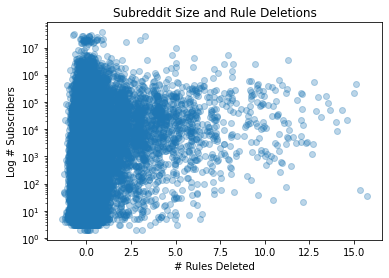

In [31]:
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.deleted) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("Log # Subscribers")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Size and Rule Deletions")

plt.show()

## H: The bigger the sub, the more likely they will delete >=1 rule

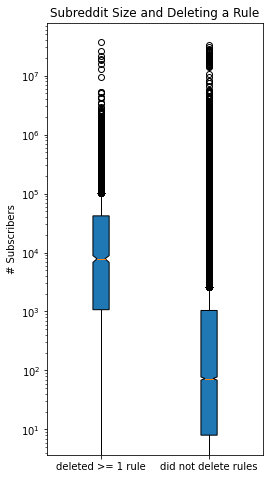

In [11]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].subscribers_1)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].subscribers_1)
data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted >= 1 rule', 'did not delete rules'])  # will be used to label x-ticks
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.title("Subreddit Size and Deleting a Rule")

# show plot
plt.show()

## H: the bigger the sub, the more total changes they will make

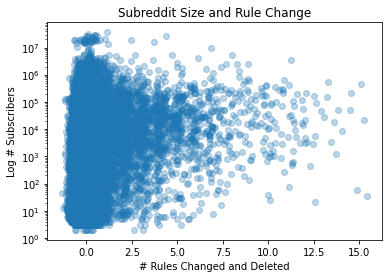

In [32]:
#     1 scatterplot x = #subscribers, y = sum(rules changed  + rules deleted)
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.deleted + sub_metadata.changed) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("Log # Subscribers")
plt.xlabel("# Rules Changed and Deleted")
plt.title("Subreddit Size and Rule Change")

plt.show()

# Hypothesis testing-- Sub Age

## H: the older the sub, the less likely that they will add a rule

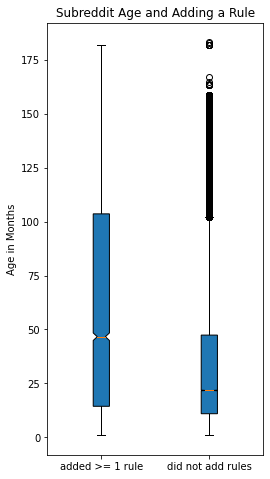

In [13]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].age_in_months)
not_added = np.array(sub_metadata[sub_metadata.added == 0].age_in_months)
data = np.array([added, not_added], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['added >= 1 rule', 'did not add rules'])  # will be used to label x-ticks

plt.ylabel("Age in Months")
plt.title("Subreddit Age and Adding a Rule")

# show plot
plt.show()

## H: the older the sub, the fewer rules they add

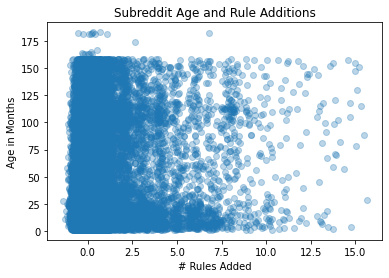

In [41]:
y = np.array(sub_metadata.age_in_months) 
x = np.array(sub_metadata.added) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Age in Months")
plt.xlabel("# Rules Added")
plt.title("Subreddit Age and Rule Additions")

plt.show()

## H: the older the sub, the less likely that they will delete a rule

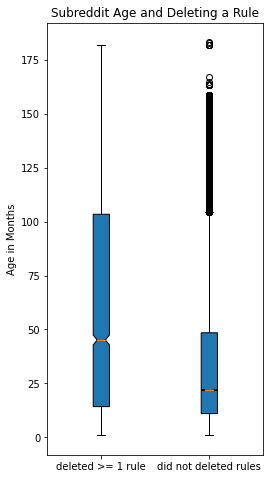

In [15]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].age_in_months)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].age_in_months)
data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted >= 1 rule', 'did not deleted rules'])  # will be used to label x-ticks

plt.ylabel("Age in Months")
plt.title("Subreddit Age and Deleting a Rule")

# show plot
plt.show()

## H: the older the sub, the fewer rules they delete

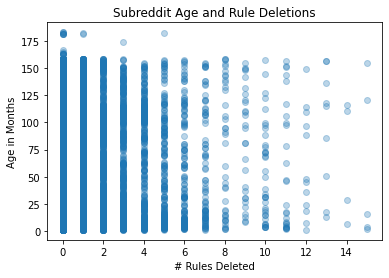

In [16]:
y = np.array(sub_metadata.age_in_months)
x = np.array(sub_metadata.deleted)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Age in Months")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Age and Rule Deletions")

plt.show()

## H: the older the sub, the fewer total changes they will make

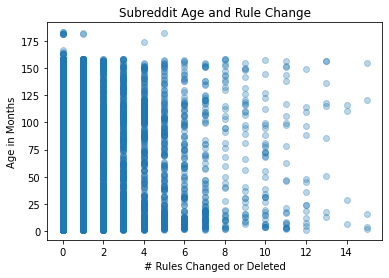

In [17]:
y = np.array(sub_metadata.age_in_months)
x = np.array(sub_metadata.deleted + sub_metadata.changed)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Age in Months")
plt.xlabel("# Rules Changed or Deleted")
plt.title("Subreddit Age and Rule Change")

plt.show()

# Hypothesis testing-- Initial Rules

## H: the more initial rules the sub has, the more likely they will delete rules

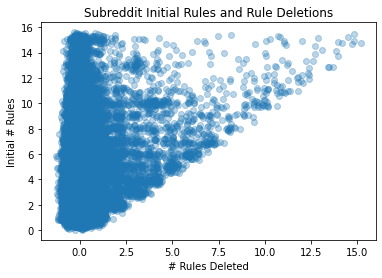

In [40]:
y = np.array(sub_metadata.rules_1) + np.random.normal(0,0.25,len(sub_metadata))
x = np.array(sub_metadata.deleted) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Initial # Rules")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Initial Rules and Rule Deletions")

plt.show()